In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Carregar o CSV
data = pd.read_csv('plantio.csv')

# Separar características e rótulo
X = data.drop('plantio', axis=1)
y = data['plantio']


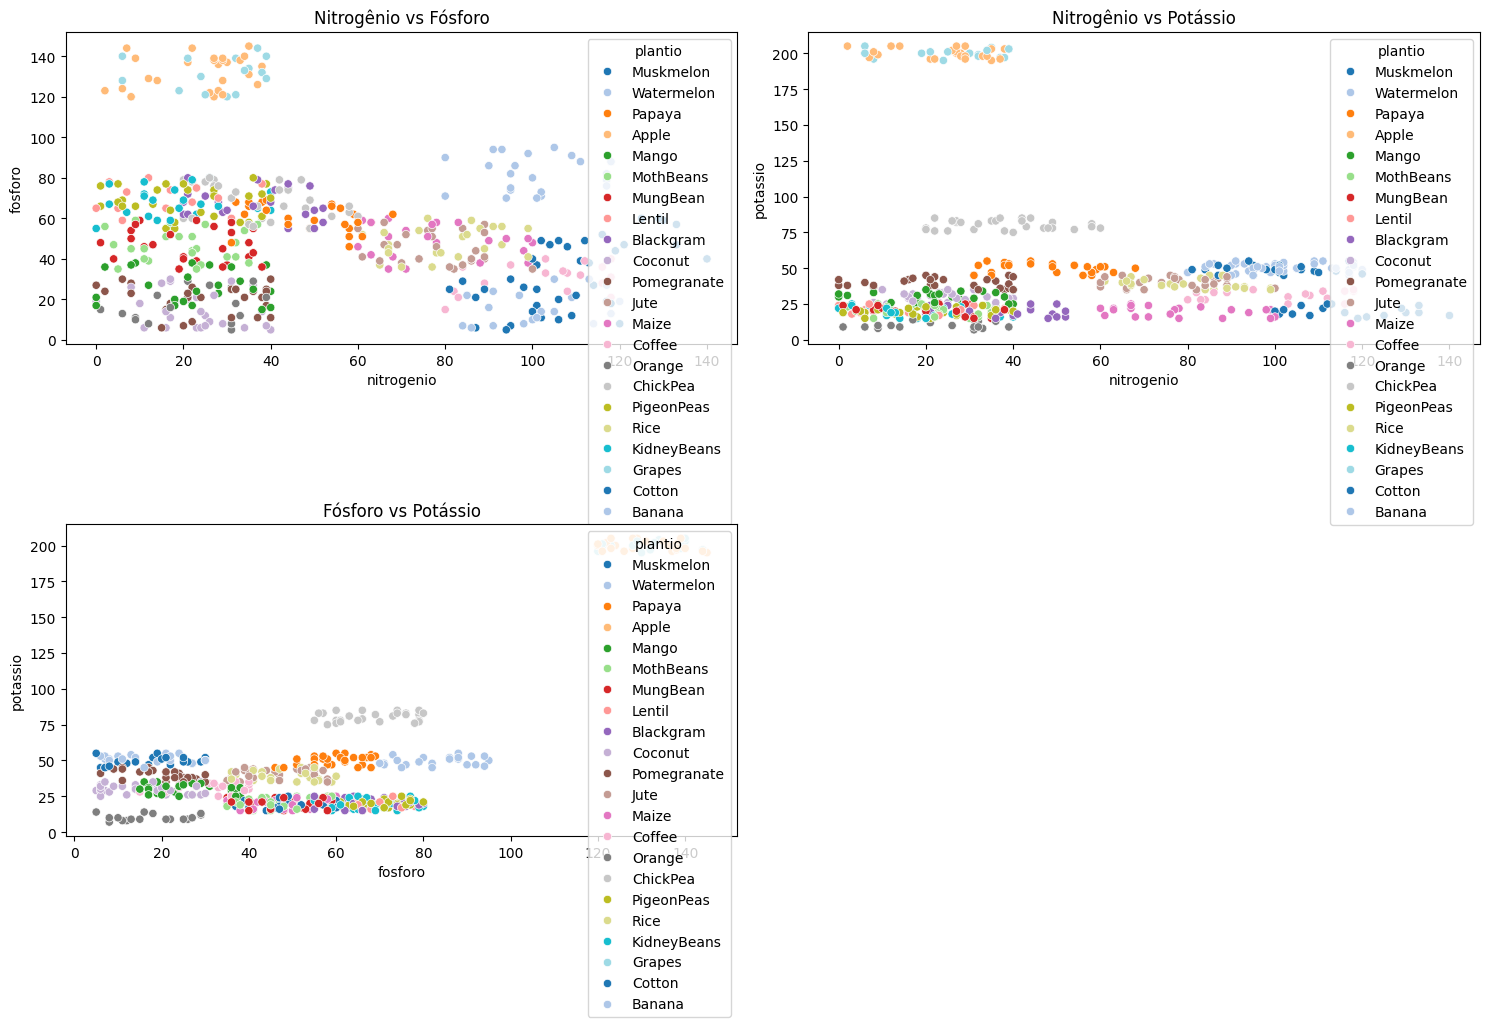

In [3]:
# Amostra de dados para gráficos (devido ao grande número de entradas)
sample_data = data.sample(n=500, random_state=42)

# Configurar o tamanho dos gráficos
plt.figure(figsize=(15, 10))

# Gráfico de dispersão: nitrogenio vs fosforo
plt.subplot(2, 2, 1)
sns.scatterplot(data=sample_data, x='nitrogenio', y='fosforo', hue='plantio', palette='tab20')
plt.title('Nitrogênio vs Fósforo')

# Gráfico de dispersão: nitrogenio vs potassio
plt.subplot(2, 2, 2)
sns.scatterplot(data=sample_data, x='nitrogenio', y='potassio', hue='plantio', palette='tab20')
plt.title('Nitrogênio vs Potássio')

# Gráfico de dispersão: fosforo vs potassio
plt.subplot(2, 2, 3)
sns.scatterplot(data=sample_data, x='fosforo', y='potassio', hue='plantio', palette='tab20')
plt.title('Fósforo vs Potássio')

plt.tight_layout()
plt.show()


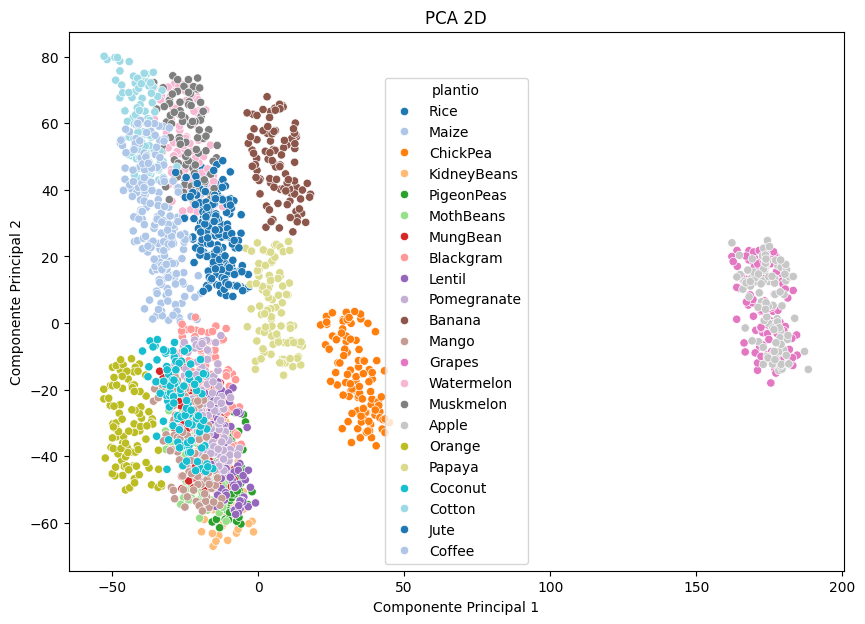

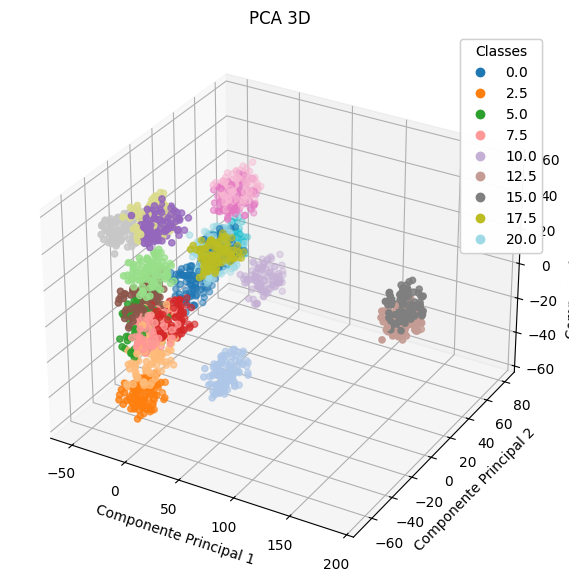

In [4]:
# Aplicar PCA para reduzir a dimensionalidade dos dados para 2D e 3D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X)

# Plotar PCA 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='tab20')
plt.title('PCA 2D')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Plotar PCA 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=pd.factorize(y)[0], cmap='tab20')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title('PCA 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
plt.show()
